In [1]:
from numpy import array
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from fitter import Fitter

from sklearn.model_selection import train_test_split
import statsmodels.api as sm

from sklearn import metrics
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import SpectralClustering
from sklearn import tree

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix

import time

import synthgauge as sg

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn import svm

from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.preprocessing import PolynomialFeatures

from sklearn import metrics
from sklearn.metrics import r2_score

In [2]:
ds3real = pd.read_csv('C:/Users/ursuz/OneDrive/Escritorio/Tesis/ds3real.csv', index_col=0)
dsreal = pd.read_csv('C:/Users/ursuz/OneDrive/Escritorio/Tesis/dsreal.csv', index_col=0)
gbareal = pd.read_csv('C:/Users/ursuz/OneDrive/Escritorio/Tesis/gbareal.csv', index_col=0)
gcreal = pd.read_csv('C:/Users/ursuz/OneDrive/Escritorio/Tesis/gcreal.csv', index_col=0)
n64real = pd.read_csv('C:/Users/ursuz/OneDrive/Escritorio/Tesis/n64real.csv', index_col=0)
pcreal = pd.read_csv('C:/Users/ursuz/OneDrive/Escritorio/Tesis/pcreal.csv', index_col=0)
ps2real = pd.read_csv('C:/Users/ursuz/OneDrive/Escritorio/Tesis/ps2real.csv', index_col=0)
ps3real = pd.read_csv('C:/Users/ursuz/OneDrive/Escritorio/Tesis/ps3real.csv', index_col=0)
ps4real = pd.read_csv('C:/Users/ursuz/OneDrive/Escritorio/Tesis/ps4real.csv', index_col=0)
pspreal = pd.read_csv('C:/Users/ursuz/OneDrive/Escritorio/Tesis/pspreal.csv', index_col=0)
psreal = pd.read_csv('C:/Users/ursuz/OneDrive/Escritorio/Tesis/psreal.csv', index_col=0)
psvreal = pd.read_csv('C:/Users/ursuz/OneDrive/Escritorio/Tesis/psvreal.csv', index_col=0)
wiireal = pd.read_csv('C:/Users/ursuz/OneDrive/Escritorio/Tesis/wiireal.csv', index_col=0)
wiiureal = pd.read_csv('C:/Users/ursuz/OneDrive/Escritorio/Tesis/wiiureal.csv', index_col=0)
x360real = pd.read_csv('C:/Users/ursuz/OneDrive/Escritorio/Tesis/x360real.csv', index_col=0)
xbreal = pd.read_csv('C:/Users/ursuz/OneDrive/Escritorio/Tesis/xbreal.csv', index_col=0)
xonereal = pd.read_csv('C:/Users/ursuz/OneDrive/Escritorio/Tesis/xonereal.csv', index_col=0)

Fitting 109 distributions:  41%|████▏     | 45/109 [00:03<00:04, 14.26it/s]c:\Users\ursuz\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:3382: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  t1 = integrate.quad(llc, -np.inf, x)[0]
Fitting 109 distributions:  63%|██████▎   | 69/109 [00:06<00:05,  6.70it/s]SKIPPED rv_continuous distribution (taking more than 30 seconds)
SKIPPED rv_histogram distribution (taking more than 30 seconds)
Fitting 109 distributions:  80%|███████▉  | 87/109 [00:13<00:11,  1.89it/s]c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and cal

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
norminvgauss,1.238219e-12,3571.308608,-4910.971048,inf,0.053139,0.763505
invgamma,1.243857e-12,3612.103028,-4915.304477,inf,0.051063,0.803617
geninvgauss,1.265487e-12,3612.273253,-4907.660084,inf,0.050958,0.805586
nct,1.423877e-12,3589.612561,-4889.735276,inf,0.051291,0.799315
fisk,1.515172e-12,3617.380249,-4885.312976,inf,0.057904,0.666112


c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


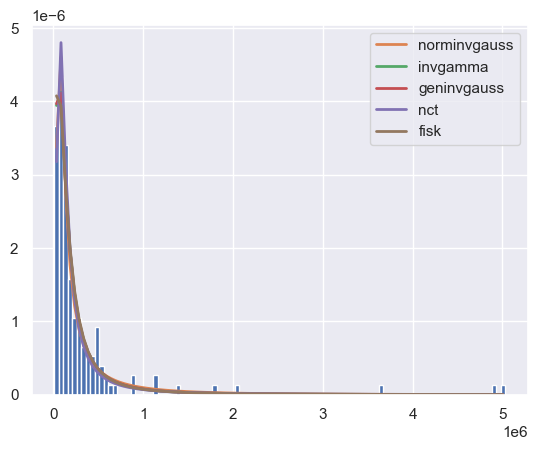

In [74]:
f = Fitter(ds3real['Ventas_norteamerica'])
f.fit()
f.summary()

In [75]:
f.get_best(method = 'sumsquare_error')

{'norminvgauss': {'a': 1.5922831221152338,
  'b': 1.5708248621649041,
  'loc': 34657.40053096816,
  'scale': 48121.81022168456}}

c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


Fitting 109 distributions:  63%|██████▎   | 69/109 [00:10<00:04,  9.86it/s]SKIPPED rv_continuous distribution (taking more than 30 seconds)
SKIPPED rv_histogram distribution (taking more than 30 seconds)
Fitting 109 distributions:  83%|████████▎ | 90/109 [00:15<00:06,  2.97it/s]c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
Fitting 109 distributions:  94%|█████████▎| 102/109 [00:21<00:04,  1.73it/s]c:\Users\ursuz\anaconda3\lib\site-pa

{'johnsonsb': {'a': -1.0638242254820276,
  'b': 1.6683535940251781,
  'loc': 5.138037319291487,
  'scale': 96.85505922949882}}

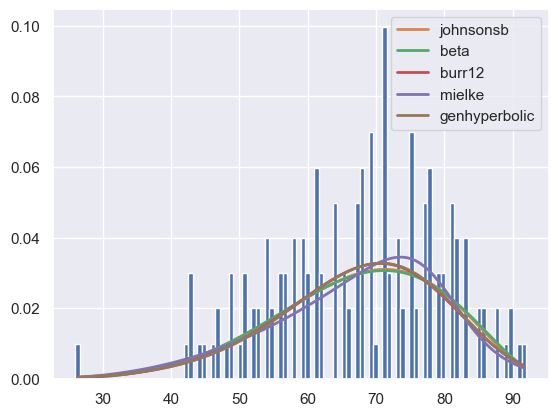

In [76]:
f = Fitter(ds3real['Calificacion_critica'])
f.fit()
f.summary()
f.get_best(method = 'sumsquare_error')

Fitting 109 distributions:  22%|██▏       | 24/109 [00:04<00:19,  4.36it/s]c:\Users\ursuz\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:3382: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  t1 = integrate.quad(llc, -np.inf, x)[0]
Fitting 109 distributions:  63%|██████▎   | 69/109 [00:29<01:06,  1.66s/it]SKIPPED rv_continuous distribution (taking more than 30 seconds)
SKIPPED rv_histogram distribution (taking more than 30 seconds)
Fitting 109 distributions:  72%|███████▏  | 78/109 [00:37<00:31,  1.02s/it]c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and cal

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
exponweib,5.800075e-14,4102.860309,-25970.426491,inf,0.060790,0.010690
halfcauchy,7.829915e-14,3867.170512,-25772.877573,inf,0.074058,0.000856
invgauss,7.953893e-14,4263.134570,-25755.295407,inf,0.066048,0.004171
fisk,9.681808e-14,3984.994052,-25617.291201,inf,0.055155,0.026882
lognorm,1.282265e-13,4154.171681,-25420.053929,inf,0.065350,0.004747


c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


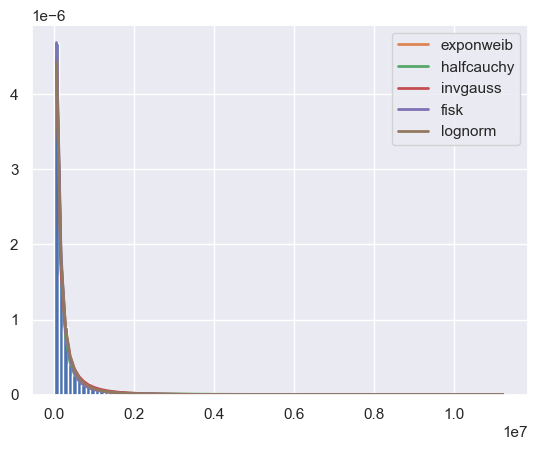

In [77]:
f = Fitter(dsreal['Ventas_norteamerica'])
f.fit()
f.get_best(method = 'sumsquare_error')
f.summary()

In [78]:
f.get_best(method = 'sumsquare_error')

{'exponweib': {'a': 38.25825097001383,
  'c': 0.24298465632421368,
  'loc': 1604.1920801359647,
  'scale': 406.1567564430686}}

c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
Fitting 109 distributions:  14%|█▍        | 15/109 [00:30<03:00,  1.92s/i

{'dgamma': {'a': 1.5062713725030208,
  'loc': 64.43117703532295,
  'scale': 7.20069929835074}}

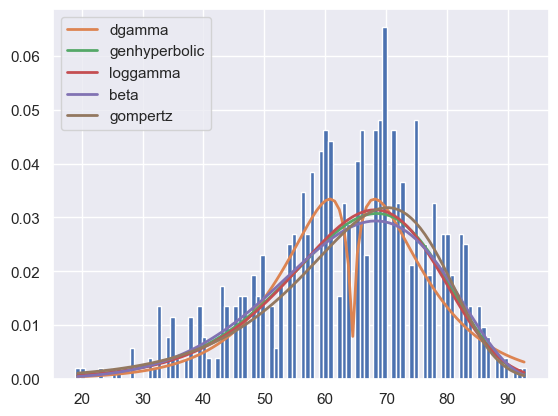

In [79]:
f = Fitter(dsreal['Calificacion_critica'])
f.fit()
f.summary()
f.get_best(method = 'sumsquare_error')

c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
Fitting 109 distributions:  30%|███       | 33/109 [00:17<00:30,  2.47it/

{'fatiguelife': {'c': 1.6997359627943454,
  'loc': 3156.70656487999,
  'scale': 98330.00491523193}}

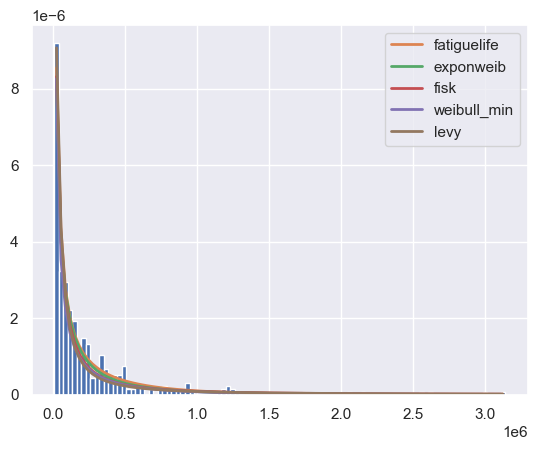

In [80]:
f = Fitter(gbareal['Ventas_norteamerica'])
f.fit()
f.summary()
f.get_best(method = 'sumsquare_error')

Fitting 109 distributions:   0%|          | 0/109 [00:00<?, ?it/s]c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
SKIPPED

{'mielke': {'k': 4.502912830551574,
  's': 22.45373354956885,
  'loc': -0.4232893790671255,
  'scale': 81.60941125335488}}

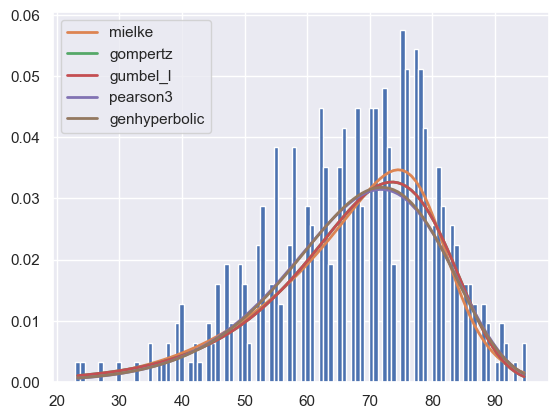

In [81]:
f = Fitter(gbareal['Calificacion_critica'])
f.fit()
f.summary()
f.get_best(method = 'sumsquare_error')

c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
Fitting 109 distributions:  25%|██▍       | 27/109 [00:23<00:59,  1.38it/

{'kappa3': {'a': 1.4652958414095738,
  'loc': 9999.99998350253,
  'scale': 133959.11970988495}}

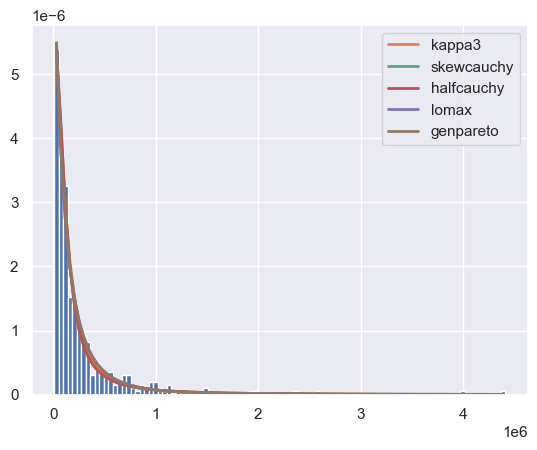

In [82]:
f = Fitter(gcreal['Ventas_norteamerica'])
f.fit()
f.summary()
f.get_best(method = 'sumsquare_error')

c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
Fitting 109 distributions:  28%|██▊       | 31/109 [00:30<01:02,  1.25it/

{'gausshyper': {'a': 17.00639084013502,
  'b': 2.901126232027906,
  'c': -35.27039056109716,
  'z': -0.2513729098996634,
  'loc': -27.65964847282541,
  'scale': 127.5556829602551}}

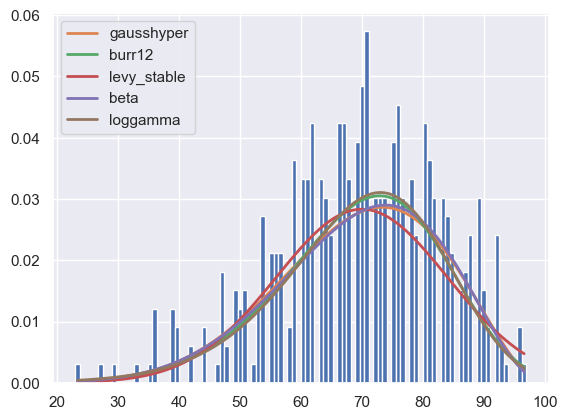

In [83]:
f = Fitter(gcreal['Calificacion_critica'])
f.fit()
f.summary()
f.get_best(method = 'sumsquare_error')

c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
Fitting 109 distributions:  24%|██▍       | 26/109 [00:35<01:30,  1.09s/i

{'loglaplace': {'c': 1.0815106313449534,
  'loc': -536.2694155056637,
  'scale': 590536.2694527204}}

c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


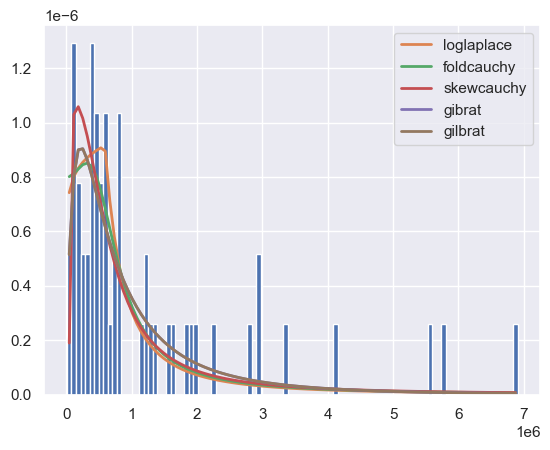

In [84]:
f = Fitter(n64real['Ventas_norteamerica'])
f.fit()
f.summary()
f.get_best(method = 'sumsquare_error')

Fitting 109 distributions:  10%|█         | 11/109 [00:12<00:51,  1.90it/s]c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
Fitting 109 distributions:  73%|███████▎  | 80/109 [01:00<00:15,  1.84it/s]SKIPPED johnsonsu distribution (taking more than 30 seconds)
SKIPPED kappa4 distribution (taking more than 30 seconds)
Fitting 109 distributions: 100%|██████████| 109/109 [01:34<00:00,  1.15it/s]
c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up t

{'triang': {'c': 0.7802047110046046,
  'loc': 52.81719567323002,
  'scale': 47.65775417993392}}

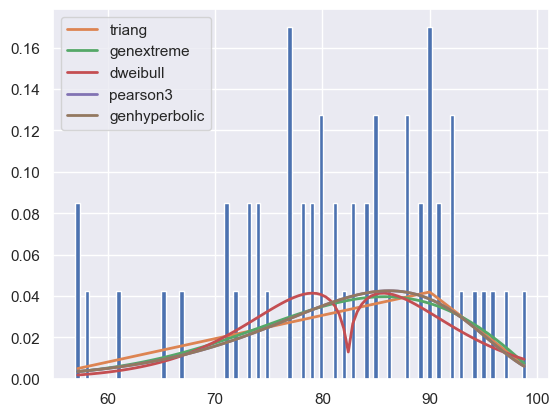

In [85]:
f = Fitter(n64real['Calificacion_critica'])
f.fit()
f.summary()
f.get_best(method = 'sumsquare_error')

Fitting 109 distributions:  29%|██▉       | 32/109 [00:36<01:24,  1.09s/it]SKIPPED burr distribution (taking more than 30 seconds)
c:\Users\ursuz\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:3382: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  t1 = integrate.quad(llc, -np.inf, x)[0]
Fitting 109 distributions:  43%|████▎     | 47/109 [00:45<00:26,  2.36it/s]c:\Users\ursuz\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:4199: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return integrate.quad(llc, _a, x)[0]
Fitting 109 distributions:  63%|██████▎   | 69/109 [01:02<00:39,  1.02it/s]SKIPPED rv_continuous distribution (taking more than 30 seconds)
SKIPPED rv_histogram distribution (taking more than 30 seconds)
Fitting 109 distributions:  75%|███████▌  | 82/109 [01:13<00:38,  1.42s/it]SKIPPED levy_stable distribution (taking more than 30 seconds)
c:\Users\ursuz\anaconda3\lib\site-packages\scipy\

{'alpha': {'a': 2.271964305297909e-14,
  'loc': -45.233657331159066,
  'scale': 18484.830121159306}}

c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


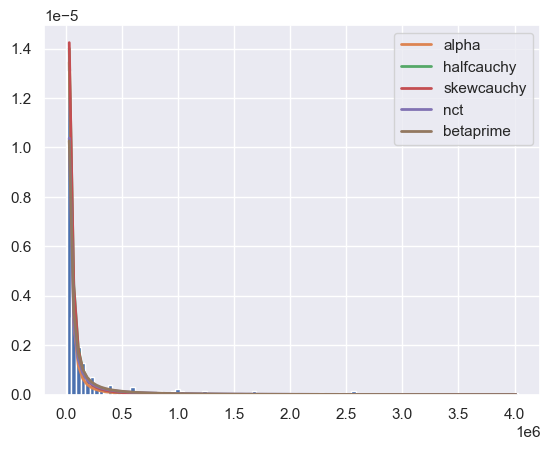

In [86]:
f = Fitter(pcreal['Ventas_norteamerica'])
f.fit()
f.summary()
f.get_best(method = 'sumsquare_error')

c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
Fitting 109 distributions:  27%|██▋       | 29/109 [00:37<00:34,  2.30it/

{'loggamma': {'c': 1.014941078869636,
  'loc': 82.52690547762984,
  'scale': 8.563353686758795}}

c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


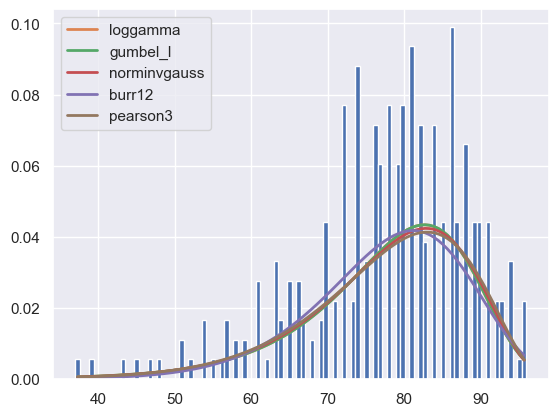

In [87]:
f = Fitter(pcreal['Calificacion_critica'])
f.fit()
f.summary()
f.get_best(method = 'sumsquare_error')

Fitting 109 distributions:   2%|▏         | 2/109 [00:14<11:51,  6.65s/it]SKIPPED arcsine distribution (taking more than 30 seconds)
SKIPPED anglit distribution (taking more than 30 seconds)
Fitting 109 distributions:   5%|▍         | 5/109 [00:41<10:59,  6.34s/it]SKIPPED alpha distribution (taking more than 30 seconds)
SKIPPED argus distribution (taking more than 30 seconds)
SKIPPED betaprime distribution (taking more than 30 seconds)
Fitting 109 distributions:  10%|█         | 11/109 [00:43<01:26,  1.13it/s]SKIPPED burr12 distribution (taking more than 30 seconds)
SKIPPED chi distribution (taking more than 30 seconds)
Fitting 109 distributions:  13%|█▎        | 14/109 [00:46<01:19,  1.20it/s]SKIPPED dgamma distribution (taking more than 30 seconds)
SKIPPED dweibull distribution (taking more than 30 seconds)
Fitting 109 distributions:  17%|█▋        | 18/109 [00:50<01:22,  1.10it/s]SKIPPED erlang distribution (taking more than 30 seconds)
SKIPPED exponnorm distribution (taking more th

{'pareto': {'b': 1.6108719999906471,
  'loc': -264941.12379598274,
  'scale': 274941.1237959827}}

c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


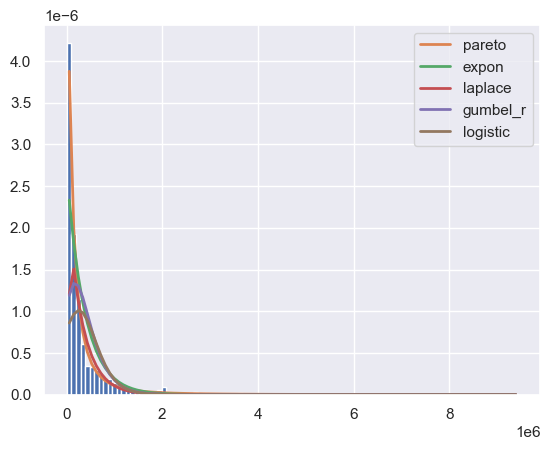

In [88]:
f = Fitter(ps2real['Ventas_norteamerica'])
f.fit()
f.summary()
f.get_best(method = 'sumsquare_error')

c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
Fitting 109 distributions:   4%|▎         | 4/109 [00:37<16:14,  9.28s/it

{'norm': {'loc': 68.76953125, 'scale': 13.067343949910917}}

c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


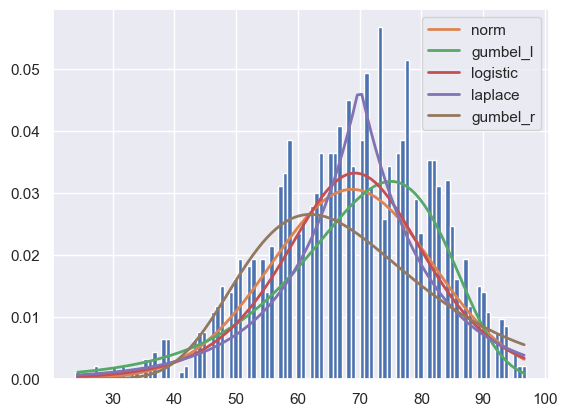

In [89]:
f = Fitter(ps2real['Calificacion_critica'])
f.fit()
f.summary()
f.get_best(method = 'sumsquare_error')

c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
Fitting 109 distributions:   2%|▏         | 2/109 [00:11<08:59,  5.04s/it

{'pareto': {'b': 2.8312815036187278,
  'loc': -781536.8685465753,
  'scale': 791536.8685465752}}

c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


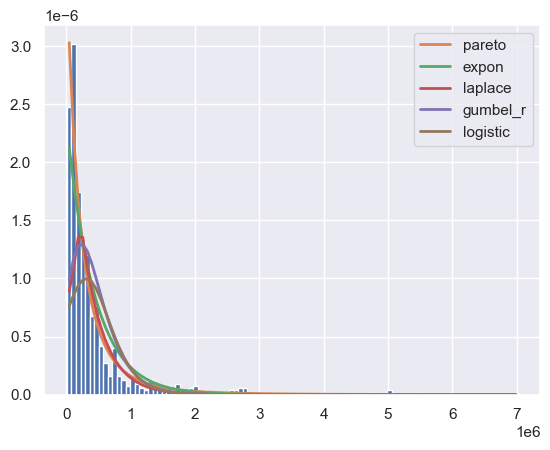

In [92]:
f = Fitter(ps3real['Ventas_norteamerica'])
f.fit()
f.summary()
f.get_best(method = 'sumsquare_error')

c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
Fitting 109 distributions:   4%|▎         | 4/109 [00:40<16:25,  9.38s/it

{'gumbel_l': {'loc': 77.13512924720743, 'scale': 11.52205590875782}}

c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


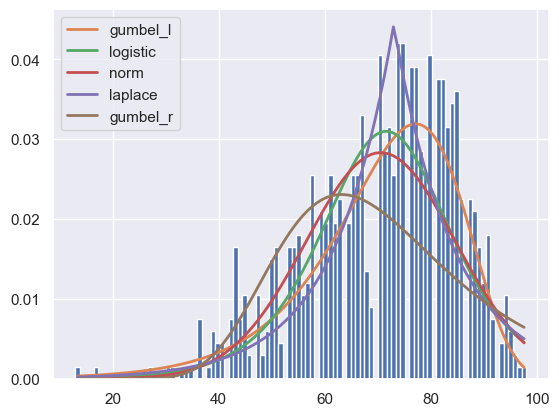

In [93]:
f = Fitter(ps3real['Calificacion_critica'])
f.fit()
f.summary()
f.get_best(method = 'sumsquare_error')

c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
Fitting 109 distributions:  21%|██        | 23/109 [00:39<01:39,  1.15s/i

{'fatiguelife': {'c': 2.062645425224636,
  'loc': 3746.069775924942,
  'scale': 123409.8202699213}}

c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


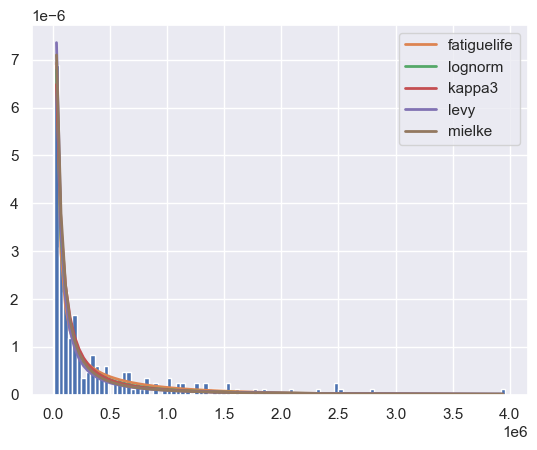

In [94]:
f = Fitter(ps4real['Ventas_norteamerica'])
f.fit()
f.summary()
f.get_best(method = 'sumsquare_error')

c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
Fitting 109 distributions:  16%|█▌        | 17/109 [00:44<03:12,  2.09s/i

{'dgamma': {'a': 1.2781197761941219,
  'loc': 75.43468591127899,
  'scale': 6.844802841339743}}

c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


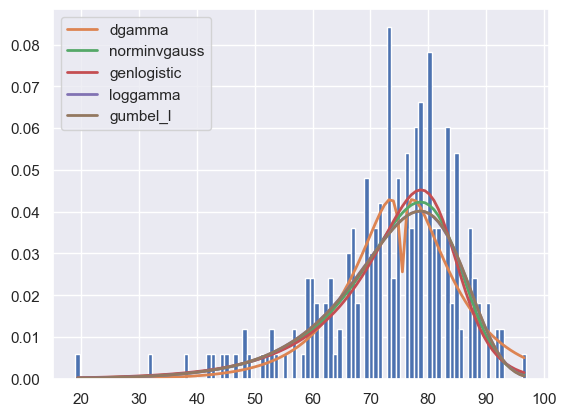

In [95]:
f = Fitter(ps4real['Calificacion_critica'])
f.fit()
f.summary()
f.get_best(method = 'sumsquare_error')

c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
Fitting 109 distributions:  14%|█▍        | 15/109 [00:43<01:57,  1.25s/i

{'foldcauchy': {'c': 0.9777244620204713,
  'loc': 353.6917634248448,
  'scale': 78049.16778473955}}

c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


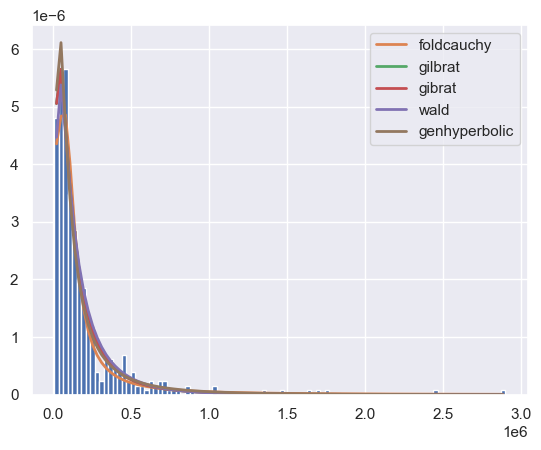

In [96]:
f = Fitter(pspreal['Ventas_norteamerica'])
f.fit()
f.summary()
f.get_best(method = 'sumsquare_error')

c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
Fitting 109 distributions:  16%|█▌        | 17/109 [00:46<02:55,  1.91s/i

{'beta': {'a': 9.163787562688384,
  'b': 3.341473818951683,
  'loc': -4.40999786381785,
  'scale': 97.94027978425481}}

c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


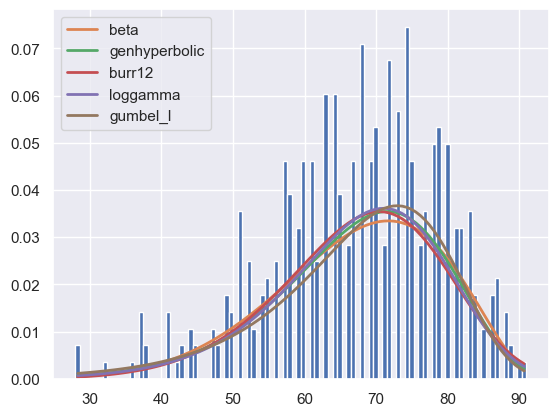

In [97]:
f = Fitter(pspreal['Calificacion_critica'])
f.fit()
f.summary()
f.get_best(method = 'sumsquare_error')

c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
Fitting 109 distributions:  15%|█▍        | 16/109 [00:39<01:26,  1.08it/

{'invgauss': {'mu': 3.678256294567858,
  'loc': -10780.136378962194,
  'scale': 147213.02091074432}}

c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


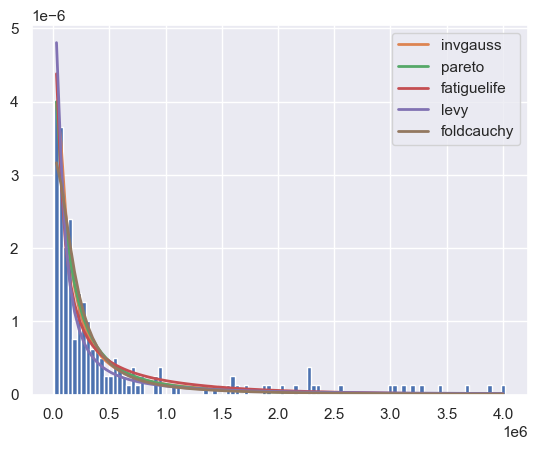

In [98]:
f = Fitter(psreal['Ventas_norteamerica'])
f.fit()
f.summary()
f.get_best(method = 'sumsquare_error')

c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
Fitting 109 distributions:  17%|█▋        | 18/109 [00:40<01:59,  1.31s/i

{'beta': {'a': 5.245691869894831,
  'b': 1.776256136231137,
  'loc': -8.555919620594855,
  'scale': 106.9701145875029}}

c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


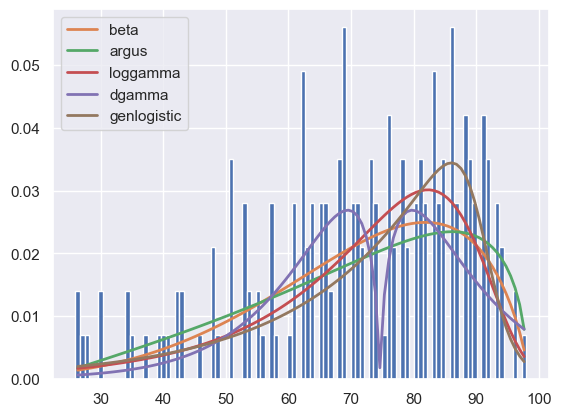

In [99]:
f = Fitter(psreal['Calificacion_critica'])
f.fit()
f.summary()
f.get_best(method = 'sumsquare_error')

c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
Fitting 109 distributions:   8%|▊         | 9/109 [00:40<04:40,  2.80s/it

{'fatiguelife': {'c': 1.2679650271096712,
  'loc': 2309.599671509329,
  'scale': 59951.729191009115}}

c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


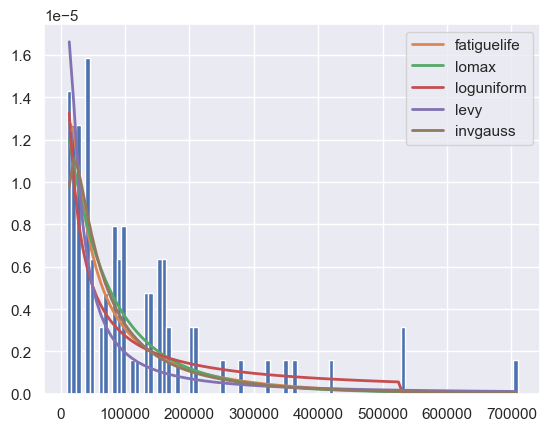

In [100]:
f = Fitter(psvreal['Ventas_norteamerica'])
f.fit()
f.summary()
f.get_best(method = 'sumsquare_error')

c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
Fitting 109 distributions:  11%|█         | 12/109 [00:43<03:53,  2.40s/i

{'dgamma': {'a': 1.609916285149877,
  'loc': 73.57390345314012,
  'scale': 5.769031904978732}}

c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


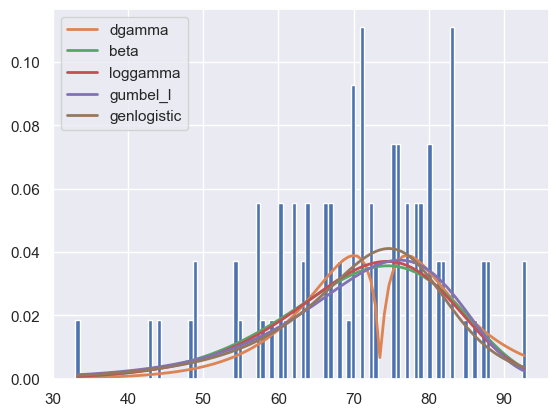

In [101]:
f = Fitter(psvreal['Calificacion_critica'])
f.fit()
f.summary()
f.get_best(method = 'sumsquare_error')

c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
Fitting 109 distributions:   0%|          | 0/109 [00:00<?, ?it/s]c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
SKIPPED

{'pareto': {'b': 1.837962344979827,
  'loc': -447203.62668906135,
  'scale': 457203.6266890613}}

c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


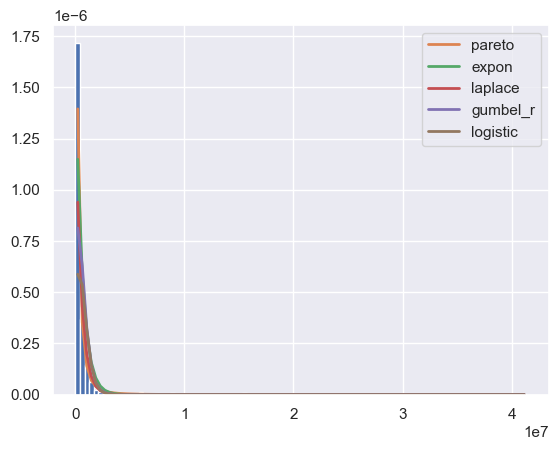

In [102]:
f = Fitter(wiireal['Ventas_norteamerica'])
f.fit()
f.summary()
f.get_best(method = 'sumsquare_error')

c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
Fitting 109 distributions:   0%|          | 0/109 [00:00<?, ?it/s]c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
SKIPPED

{'gumbel_l': {'loc': 69.94342715022462, 'scale': 13.021057866036536}}

c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


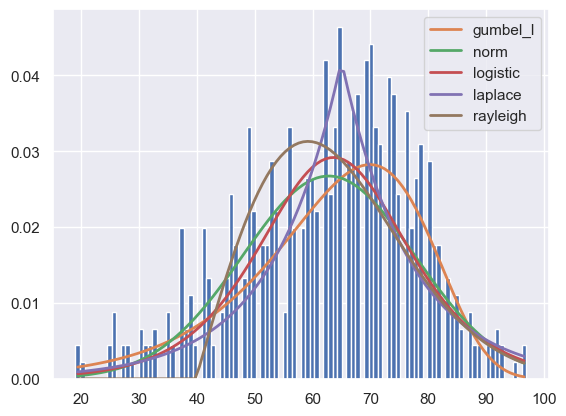

In [103]:
f = Fitter(wiireal['Calificacion_critica'])
f.fit()
f.summary()
f.get_best(method = 'sumsquare_error')

c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
Fitting 109 distributions:   7%|▋         | 8/109 [00:49<05:13,  3.11s/it

{'pareto': {'b': 2.8376202494177196,
  'loc': -660456.4604207143,
  'scale': 670456.4604207142}}

c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


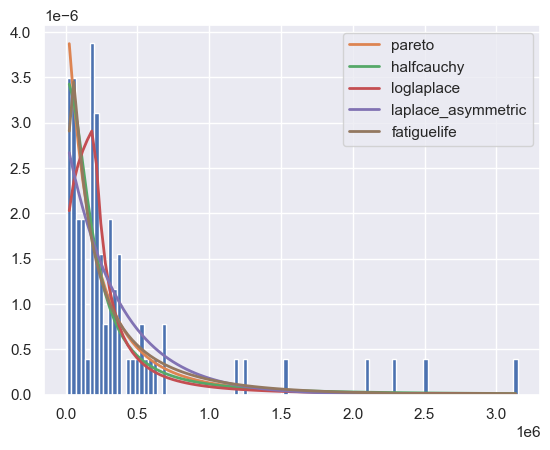

In [104]:
f = Fitter(wiiureal['Ventas_norteamerica'])
f.fit()
f.summary()
f.get_best(method = 'sumsquare_error')

c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
Fitting 109 distributions:   0%|          | 0/109 [00:00<?, ?it/s]c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
SKIPPED

{'loggamma': {'c': 0.4602852488255255,
  'loc': 85.142215652924,
  'scale': 6.43263317349776}}

c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


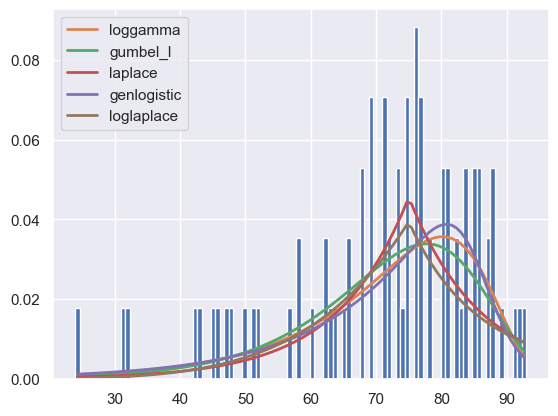

In [105]:
f = Fitter(wiiureal['Calificacion_critica'])
f.fit()
f.summary()
f.get_best(method = 'sumsquare_error')

Fitting 109 distributions:   2%|▏         | 2/109 [00:23<20:07, 11.29s/it]SKIPPED anglit distribution (taking more than 30 seconds)
SKIPPED alpha distribution (taking more than 30 seconds)
Fitting 109 distributions:   4%|▎         | 4/109 [00:45<17:09,  9.80s/it]SKIPPED argus distribution (taking more than 30 seconds)
SKIPPED beta distribution (taking more than 30 seconds)
Fitting 109 distributions:   9%|▉         | 10/109 [00:52<02:56,  1.78s/it]SKIPPED cauchy distribution (taking more than 30 seconds)
SKIPPED burr12 distribution (taking more than 30 seconds)
Fitting 109 distributions:  10%|█         | 11/109 [00:53<02:37,  1.61s/it]SKIPPED cosine distribution (taking more than 30 seconds)
SKIPPED dweibull distribution (taking more than 30 seconds)
Fitting 109 distributions:  14%|█▍        | 15/109 [01:00<02:44,  1.75s/it]SKIPPED chi2 distribution (taking more than 30 seconds)
SKIPPED chi distribution (taking more than 30 seconds)
Fitting 109 distributions:  17%|█▋        | 18/109 [01

{'pareto': {'b': 1.997898927857518,
  'loc': -596016.5051352283,
  'scale': 606016.5051352282}}

c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


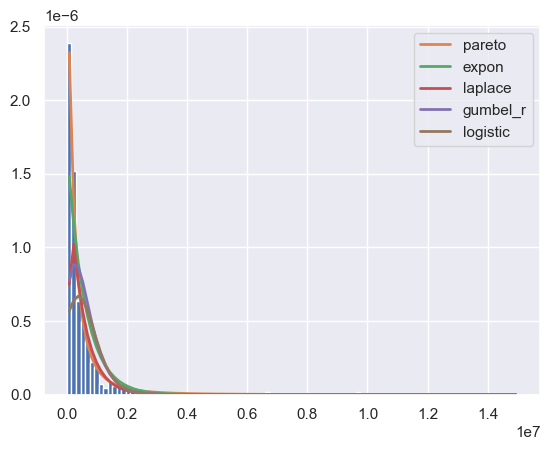

In [106]:
f = Fitter(x360real['Ventas_norteamerica'])
f.fit()
f.summary()
f.get_best(method = 'sumsquare_error')

c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
Fitting 109 distributions:   5%|▍         | 5/109 [00:44<11:18,  6.52s/it

{'gumbel_l': {'loc': 75.68861269796307, 'scale': 12.344554897586136}}

c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


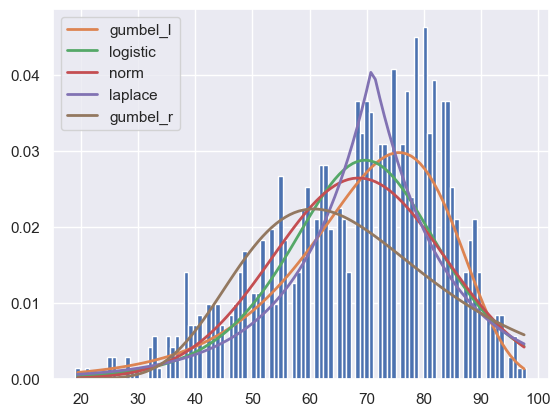

In [107]:
f = Fitter(x360real['Calificacion_critica'])
f.fit()
f.summary()
f.get_best(method = 'sumsquare_error')

Fitting 109 distributions:   3%|▎         | 3/109 [00:46<28:39, 16.22s/it]SKIPPED anglit distribution (taking more than 30 seconds)
SKIPPED beta distribution (taking more than 30 seconds)
Fitting 109 distributions:   7%|▋         | 8/109 [00:50<04:21,  2.59s/it]SKIPPED burr distribution (taking more than 30 seconds)
SKIPPED bradford distribution (taking more than 30 seconds)
Fitting 109 distributions:  12%|█▏        | 13/109 [00:57<02:47,  1.74s/it]SKIPPED chi2 distribution (taking more than 30 seconds)
SKIPPED cosine distribution (taking more than 30 seconds)
Fitting 109 distributions:  20%|██        | 22/109 [01:07<01:14,  1.17it/s]SKIPPED f distribution (taking more than 30 seconds)
SKIPPED fatiguelife distribution (taking more than 30 seconds)
Fitting 109 distributions:  25%|██▍       | 27/109 [01:25<02:43,  1.99s/it]SKIPPED gamma distribution (taking more than 30 seconds)
SKIPPED gausshyper distribution (taking more than 30 seconds)
Fitting 109 distributions:  34%|███▍      | 37/1

{'expon': {'loc': 10000.0, 'scale': 224427.58620689655}}

c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


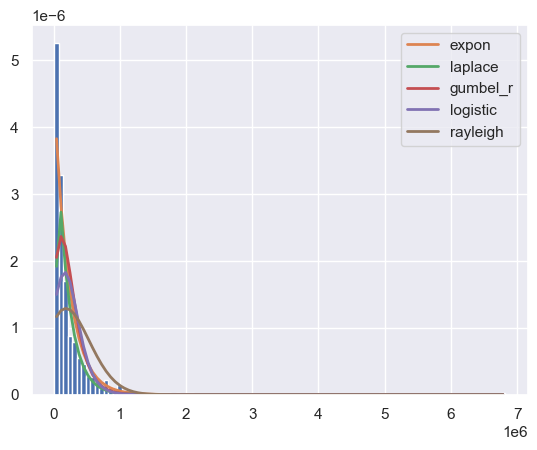

In [108]:
f = Fitter(xbreal['Ventas_norteamerica'])
f.fit()
f.summary()
f.get_best(method = 'sumsquare_error')

Fitting 109 distributions:  26%|██▌       | 28/109 [00:05<00:17,  4.50it/s]c:\Users\ursuz\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:3382: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  t1 = integrate.quad(llc, -np.inf, x)[0]
c:\Users\ursuz\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:3382: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  t1 = integrate.quad(llc, -np.inf, x)[0]
Fitting 109 distributions:  74%|███████▍  | 81/109 [00:38<00:27,  1.00it/s]c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in orde

{'beta': {'a': 22.451828433505117,
  'b': 3.529483560514736,
  'loc': -113.87950281116031,
  'scale': 212.62134558898097}}

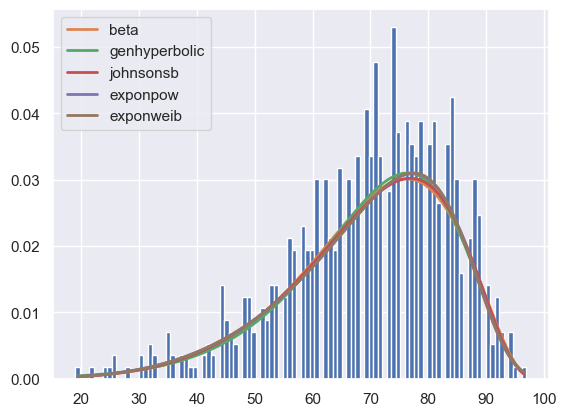

In [3]:
f = Fitter(xbreal['Calificacion_critica'])
f.fit()
f.summary()
f.get_best(method = 'sumsquare_error')

Fitting 109 distributions:  28%|██▊       | 30/109 [00:09<00:14,  5.57it/s]c:\Users\ursuz\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:3382: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  t1 = integrate.quad(llc, -np.inf, x)[0]
Fitting 109 distributions:  63%|██████▎   | 69/109 [00:21<00:09,  4.14it/s]SKIPPED rv_continuous distribution (taking more than 30 seconds)
SKIPPED rv_histogram distribution (taking more than 30 seconds)
Fitting 109 distributions:  83%|████████▎ | 91/109 [00:37<00:16,  1.11it/s]c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and cal

{'truncweibull_min': {'c': 0.13245279330528698,
  'a': 0.005685779571574392,
  'b': 1.4914610626902052,
  'loc': -2284.0597984731994,
  'scale': 2160488.222205326}}

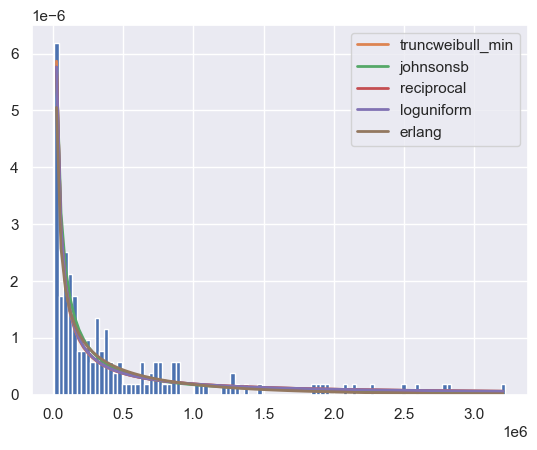

In [4]:
f = Fitter(xonereal['Ventas_norteamerica'])
f.fit()
f.summary()
f.get_best(method = 'sumsquare_error')

c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
c:\Users\ursuz\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
Fitting 109 distributions:  61%|██████▏   | 67/109 [00:32<00:23,  1.79it/

{'johnsonsu': {'a': 2.072929878678482,
  'b': 1.761556002907372,
  'loc': 91.88420954477795,
  'scale': 10.591743392533072}}

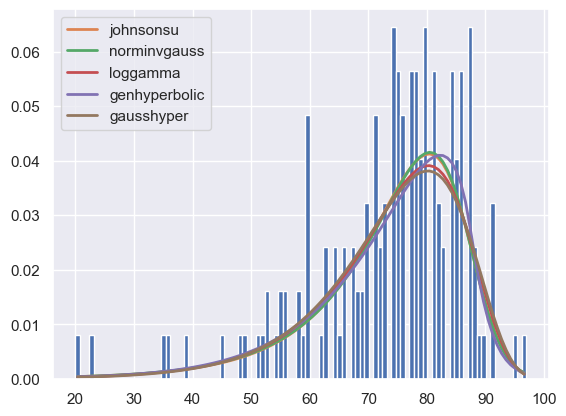

In [5]:
f = Fitter(xonereal['Calificacion_critica'])
f.fit()
f.summary()
f.get_best(method = 'sumsquare_error')

In [91]:
from scipy.stats import burr12, burr, genpareto, pearson3, johnsonsb, halfgennorm, dgamma, rdist, mielke, norminvgauss, exponweib, fatiguelife, kappa3, gausshyper, loglaplace, triang, alpha, loggamma, pareto, gumbel_l, foldcauchy, beta, invgauss, expon, truncweibull_min, johnsonsu, norm

ds3syn = pd.DataFrame(norminvgauss.rvs(a=1.5922831221152338, b=1.5708248621649041, loc=34657.40053096816, scale=48121.81022168456, size=1500), columns=['Ventas_norteamerica'])
ds3syn['Calificacion_critica'] = johnsonsb.rvs(a=-1.0638242254820276, b=1.6683535940251781, loc=5.138037319291487, scale=96.85505922949882, size=1500)


dssyn= pd.DataFrame(exponweib.rvs(a=38.25825097001383, c=0.24298465632421368, loc=1604.1920801359647, scale=406.1567564430686, size=1500), columns=['Ventas_norteamerica'])
dssyn['Calificacion_critica'] = dgamma.rvs(a=1.5062713725030208, loc=64.43117703532295, scale=7.20069929835074, size=1500)


gbasyn= pd.DataFrame(fatiguelife.rvs(c=1.6997359627943454, loc=3156.70656487999, scale=98330.00491523193, size=1500), columns=['Ventas_norteamerica'])
gbasyn['Calificacion_critica'] = mielke.rvs(k=4.502912830551574, s=22.45373354956885, loc=-0.4232893790671255, scale=81.60941125335488, size=1500)


gcsyn= pd.DataFrame(kappa3.rvs(a=1.4652958414095738, loc=9999.99998350253, scale=133959.11970988495, size=1500), columns=['Ventas_norteamerica'])
gcsyn['Calificacion_critica'] = gausshyper.rvs(a=17.00639084013502, b=2.901126232027906, c=-35.27039056109716, z=-0.2513729098996634, loc=-27.65964847282541, scale=127.5556829602551, size=1500)


n64syn= pd.DataFrame(loglaplace.rvs(c=1.0815106313449534, loc=-536.2694155056637, scale=590536.2694527204, size=1500), columns=['Ventas_norteamerica'])
n64syn['Calificacion_critica'] = triang.rvs(c=0.7802047110046046, loc=52.81719567323002, scale=47.65775417993392, size=1500)

pcsyn= pd.DataFrame(alpha.rvs(a=2.271964305297909e-14, loc=-45.233657331159066, scale=18484.830121159306, size=1500), columns=['Ventas_norteamerica'])
pcsyn['Calificacion_critica'] = loggamma.rvs(c=1.014941078869636, loc=82.52690547762984, scale=8.563353686758795, size=1500)

ps2syn= pd.DataFrame(pareto.rvs(b=1.6108719999906471, loc=-264941.12379598274, scale=274941.1237959827, size=1500), columns=['Ventas_norteamerica'])
ps2syn['Calificacion_critica'] = norm.rvs(loc=68.76953125, scale=13.067343949910917, size=1500)


ps3syn= pd.DataFrame(pareto.rvs(b=2.8312815036187278, loc=-781536.8685465753, scale=791536.8685465752, size=1500), columns=['Ventas_norteamerica'])
ps3syn['Calificacion_critica'] = gumbel_l.rvs(loc=77.13512924720743, scale=11.52205590875782, size=1500)


ps4syn= pd.DataFrame(fatiguelife.rvs(c=2.062645425224636, loc=3746.069775924942, scale=123409.8202699213, size=1500), columns=['Ventas_norteamerica'])
ps4syn['Calificacion_critica'] = dgamma.rvs(a=1.2781197761941219, loc=75.43468591127899, scale=6.844802841339743, size=1500)

pspsyn= pd.DataFrame(foldcauchy.rvs(c=0.9777244620204713, loc=353.6917634248448, scale=78049.16778473955, size=1500), columns=['Ventas_norteamerica'])
pspsyn['Calificacion_critica'] = beta.rvs(a=9.163787562688384, b=3.341473818951683, loc=-4.40999786381785, scale=97.94027978425481, size=1500)


pssyn= pd.DataFrame(invgauss.rvs(mu=3.678256294567858, loc=-10780.136378962194, scale=147213.02091074432, size=1500), columns=['Ventas_norteamerica'])
pssyn['Calificacion_critica'] = beta.rvs(a=5.245691869894831, b=1.776256136231137, loc=-8.555919620594855, scale=106.9701145875029, size=1500)


psvsyn= pd.DataFrame(fatiguelife.rvs(c=1.2679650271096712, loc=2309.599671509329, scale=59951.729191009115, size=1500), columns=['Ventas_norteamerica'])
psvsyn['Calificacion_critica'] = dgamma.rvs(a=1.609916285149877, loc=73.57390345314012, scale=5.769031904978732, size=1500)


wiisyn= pd.DataFrame(pareto.rvs(b=1.837962344979827, loc=-447203.62668906135, scale=457203.6266890613, size=1500), columns=['Ventas_norteamerica'])
wiisyn['Calificacion_critica'] = gumbel_l.rvs(loc=69.94342715022462, scale=13.021057866036536, size=1500)


wiiusyn= pd.DataFrame(pareto.rvs(b=2.8376202494177196, loc=-660456.4604207143, scale=670456.4604207142, size=1500), columns=['Ventas_norteamerica'])
wiiusyn['Calificacion_critica'] = loggamma.rvs(c=0.4602852488255255, loc=85.142215652924, scale=6.43263317349776, size=1500)


x360syn= pd.DataFrame(pareto.rvs(b=1.997898927857518, loc=-596016.5051352283, scale=606016.5051352282, size=1500), columns=['Ventas_norteamerica'])
x360syn['Calificacion_critica'] = gumbel_l.rvs(loc=75.68861269796307, scale=12.344554897586136, size=1500)


xbsyn= pd.DataFrame(expon.rvs(loc=10000.0, scale=224427.58620689655, size=1500), columns=['Ventas_norteamerica'])
xbsyn['Calificacion_critica'] = beta.rvs(a=22.451828433505117, b=3.529483560514736, loc=-113.87950281116031, scale=212.62134558898097, size=1500)


xonesyn= pd.DataFrame(truncweibull_min.rvs(c=0.13245279330528698, a=0.005685779571574392, b=1.4914610626902052, loc=-2284.0597984731994, scale=2160488.222205326, size=1500), columns=['Ventas_norteamerica'])
xonesyn['Calificacion_critica'] = johnsonsu.rvs(a=2.072929878678482, b=1.761556002907372, loc=91.88420954477795, scale=10.591743392533072, size=1500)

In [92]:
ds3syn.to_csv('ds3syn.csv', index=False)
dssyn.to_csv('dssyn.csv', index=False)
gbasyn.to_csv('gbasyn.csv', index=False)
gcsyn.to_csv('gcsyn.csv', index=False)
n64syn.to_csv('n64syn.csv', index=False)
pcsyn.to_csv('pcsyn.csv', index=False)
ps2syn.to_csv('ps2syn.csv', index=False)
ps3syn.to_csv('ps3syn.csv', index=False)
ps4syn.to_csv('ps4syn.csv', index=False)
pspsyn.to_csv('pspsyn.csv', index=False)
pssyn.to_csv('pssyn.csv', index=False)
psvsyn.to_csv('psvsyn.csv', index=False)
wiisyn.to_csv('wiisyn.csv', index=False)
wiiusyn.to_csv('wiiusyn.csv', index=False)
x360syn.to_csv('x360syn.csv', index=False)
xbsyn.to_csv('xbsyn.csv', index=False)
xonesyn.to_csv('xonesyn.csv', index=False)